In [1]:
import vitaldb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# colorblind friendly palette
from cycler import cycler
cp = ["#172A5A", "#FF7171", "#227567", "#34BAEA", "#F9D466", ]
plt.rcParams['axes.prop_cycle'] = cycler(color=cp)

# set default font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Open Sans', 'Arial']

# automatically despine
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# set defualt DPI
plt.rcParams['figure.dpi'] = 72


In [3]:
# ECG, ?, PPG
track_names = ['ECG_II', 'ART', 'PLETH']
caseids = vitaldb.find_cases(track_names)
cid = caseids[0]

print('tracks:', track_names)
print('found', len(caseids), 'case ids')
print('case id:', cid)

vf = vitaldb.VitalFile(cid, track_names)

fs = 100
data = vf.to_numpy(track_names, 1/fs)
t = np.arange(data.shape[0]) / fs

ecg = data[:,0]
art = data[:,1]
ppg = data[:,2]


tracks: ['ECG_II', 'ART', 'PLETH']
found 3458 case ids
case id: 1


FileNotFoundError: [Errno 2] No such file or directory: 'figs/demo.pdf'

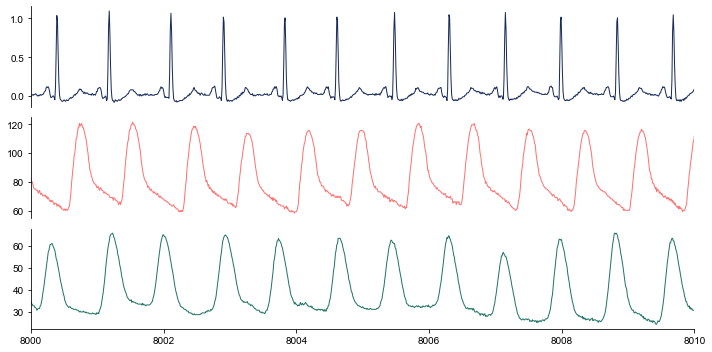

In [4]:
ta, tb = 8000, 8010
twin = (t >= ta) & (t <= tb)

plt.figure(figsize=(10,5))

plt.subplot(3,1,1)
plt.plot(t[twin], ecg[twin], lw=1, c=cp[0])
sns.despine(ax=plt.gca(), bottom=True)
plt.xticks([])
plt.xlim(ta, tb)

plt.subplot(3,1,2)
plt.plot(t[twin], art[twin], lw=1, c=cp[1])
plt.xticks([])
plt.xlim(ta, tb)
sns.despine(ax=plt.gca(), bottom=True)

plt.subplot(3,1,3)
plt.plot(t[twin], ppg[twin], lw=1, c=cp[2])
# plt.xticks([])
plt.xlim(ta, tb)

plt.tight_layout()
plt.savefig('figs/demo.pdf')
plt.show()


working.